In [ ]:
from act.data_processing import *
from act.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.segregation import ACTSegregator
from act.act_types import SimulationParameters, ConstantCurrentInjection

target_data = np.load("./output/original_LAA/combined_out.npy")
comp_data = np.load("./output/seg_20_20_LAA/combined_out.npy")

CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.045,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.050,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.055,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.060,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.0,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.1,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.2,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.3,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.4,dur=800,delay=100),
    ConstantCurrentInjection(amp=4.5,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=5.0,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=5.5,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=6.0,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=6.5,dur=800,delay=100, lto_hto=1)]


V_target = target_data[:,:,0]

V_comp = comp_data[:,:,0]

target_fi = get_fi_curve(V_target, 0, CI)

comp_fi = get_fi_curve(V_comp, 0, CI)

mae_fi = mae_score(target_fi, comp_fi)

print(mae_fi)

list_mae_v = []
for i in range(15):
    
    V_target = target_data[i,:,0]

    V_comp = comp_data[i,:,0]
    
    list_mae_v.append(mae_score(V_target, V_comp))
    
mean_mae_v = np.mean(list_mae_v)

print(mean_mae_v)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from act.data_processing import *
from act.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.segregation import ACTSegregator
from act.act_types import SimulationParameters, ConstantCurrentInjection
import re

# 2) Compute the two MAE matrices:
def compute_error_matrices(
    target_file: str,
    comp_dir_template: str,
    seg_steps: np.ndarray
):
    # load once
    target_data = np.load(target_file)  
    V_target_all = target_data[:, :, 0]
    target_fi = get_fi_curve(V_target_all, 0, CI)

    n = len(seg_steps)
    fi_mae_matrix = np.zeros((n, n))
    v_mae_matrix = np.zeros((n, n))

    for i_idx, i in enumerate(seg_steps):
        for j_idx, j in enumerate(seg_steps):
            comp_path = comp_dir_template.format(i=i, j=j)
            if not os.path.isfile(comp_path):
                raise FileNotFoundError(f"Missing file: {comp_path}")
            comp_data = np.load(comp_path)
            V_comp_all = comp_data[:, :, 0]

            # FI‑curve MAE
            comp_fi = get_fi_curve(V_comp_all, 0, CI)
            fi_mae_matrix[j_idx, i_idx] = mae_score(target_fi, comp_fi)

            # Voltage‑trace MAE (averaged over stim indices)
            maes = [
                mae_score(target_data[k, :, 0], comp_data[k, :, 0])
                for k in range(comp_data.shape[0])
            ]
            v_mae_matrix[j_idx, i_idx] = np.mean(maes)

    return fi_mae_matrix, v_mae_matrix

# 3) Plotting helpers:
def plot_contour(matrix: np.ndarray, seg_steps: np.ndarray, title: str):
    fname = re.sub(r'[<>:"/\\|?*\s]+', '_', title).strip('_') + ".png"
    X, Y = np.meshgrid(seg_steps, seg_steps)
    plt.figure()
    cs = plt.contourf(X, Y, matrix)
    plt.xlabel("Spiking Module Voltage Cutoff Shift")
    plt.ylabel("Bursting Module Voltage Cutoff Shift")
    plt.title(title)
    plt.colorbar(cs, label="MAE")
    plt.tight_layout()
    plt.savefig(fname, dpi=300)
    plt.show()
    

def plot_fi_mae_contour(fi_mae: np.ndarray, seg_steps: np.ndarray):
    plot_contour(fi_mae, seg_steps, "FI‑Curve MAE over Segmentation Grid")

def plot_v_mae_contour(v_mae: np.ndarray, seg_steps: np.ndarray):
    plot_contour(v_mae, seg_steps, "Voltage‑Trace MAE over Segmentation Grid")


--No graphics will be displayed.


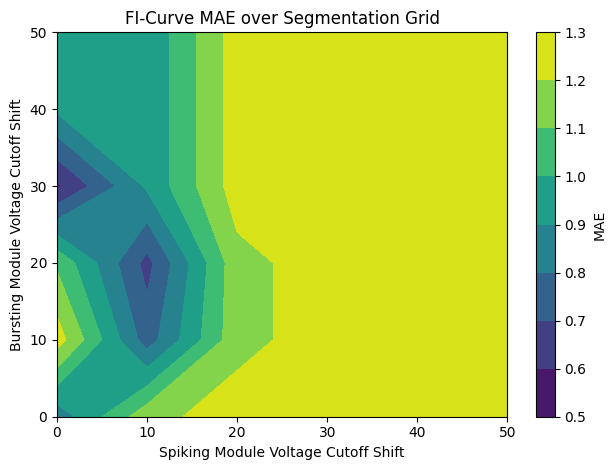

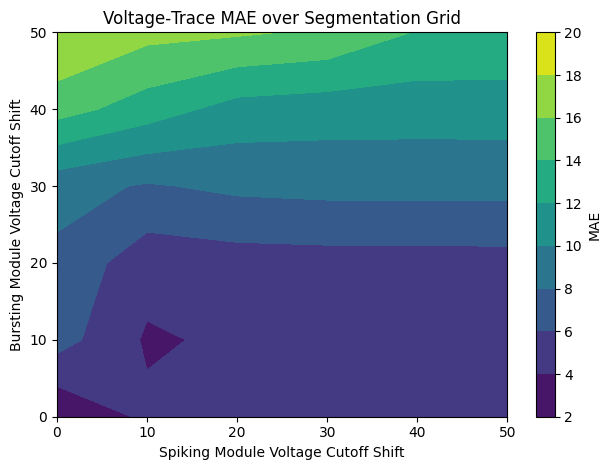

In [2]:

CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.045,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.050,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.055,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.060,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.0,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.1,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.2,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.3,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.4,dur=800,delay=100),
    ConstantCurrentInjection(amp=4.5,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=5.0,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=5.5,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=6.0,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=6.5,dur=800,delay=100, lto_hto=1)]

seg_steps = np.arange(0, 51, 10)           # [0,10,20,30,40,50]

target_file = "./output/original_LAA/combined_out.npy"
pattern = "./output/seg_{i}_{j}_LAA/combined_out.npy"

fi_mae, v_mae = compute_error_matrices(target_file, pattern, seg_steps)
plot_fi_mae_contour(fi_mae, seg_steps)
plot_v_mae_contour(v_mae, seg_steps)
